# Get ERCOT Ancillary Services Prices

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px

In [2]:
iso = gridstatus.Ercot()

## Get AS Prices

Note: the time specified is the delivery time of the ancillary service

In [3]:
df = iso.get_as_prices("today")
df

,Time,Market,Non-Spinning Reserves,Regulation Down,Regulation Up,Responsive Reserves
0,2022-11-29 00:00:00-06:00,DAM,0.75,4.00,3.19,2.39
1,2022-11-29 01:00:00-06:00,DAM,0.55,3.69,4.69,2.69
2,2022-11-29 02:00:00-06:00,DAM,0.48,2.41,3.19,2.39
3,2022-11-29 03:00:00-06:00,DAM,0.69,3.50,4.69,2.69
4,2022-11-29 04:00:00-06:00,DAM,0.50,4.00,5.98,2.69
5,2022-11-29 05:00:00-06:00,DAM,0.91,8.34,10.32,6.00
6,2022-11-29 06:00:00-06:00,DAM,1.09,8.02,10.00,8.00
7,2022-11-29 07:00:00-06:00,DAM,1.53,10.00,8.00,8.00
8,2022-11-29 08:00:00-06:00,DAM,1.04,12.03,5.00,2.23
9,2022-11-29 09:00:00-06:00,DAM,1.08,3.69,3.69,2.50


## Get Historical AS Prices

ERCOT publishes the last 30 days of prices.

In [4]:
today = pd.Timestamp.now().date()
thirty_days_ago = today - pd.Timedelta(days=30)
df = iso.get_as_prices(start=thirty_days_ago, end=today)
df

 33%|███▎      | 10/30 [00:03<00:06,  3.04it/s]

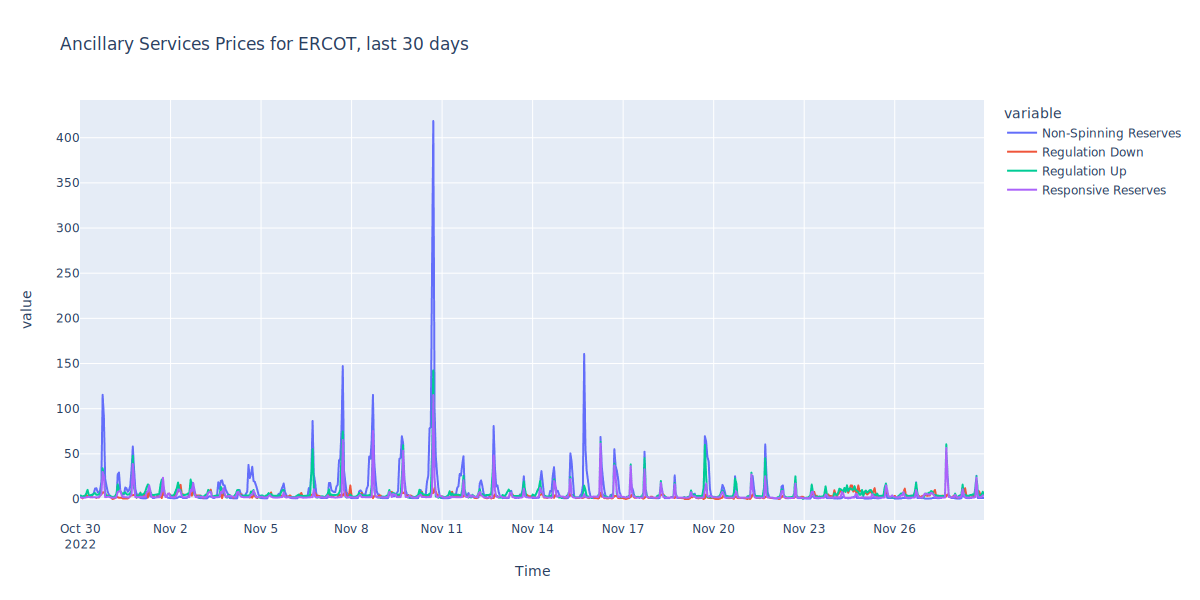

In [ ]:
data = df.set_index("Time").drop(columns=["Market"])
fig = px.line(data, x=data.index, y=data.columns, title="Ancillary Services Prices for ERCOT, last 30 days")
# height=600, width=800
fig.show("svg", width = 1200, height = 600)